#Graphs: Basic Matrix Operations

In [0]:
import numpy as np
import networkx as nx
import scipy

**Create a Graph**

Toy graph taken from the course [Networks: Friends, Money, and Bytes](https://www.coursera.org/learn/friends-money-bytes/) (Week 2 Lesson 2).

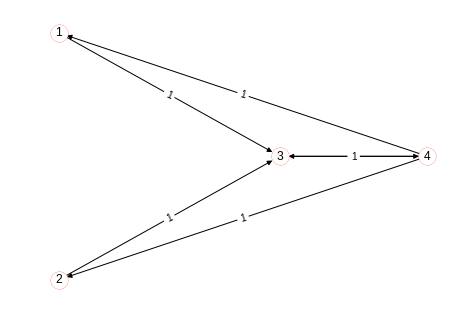

In [5]:
G = nx.DiGraph() # directed
# G = nx.Graph() # undirected
G.add_edge(1, 3, transition_probability=1)
G.add_edge(2, 3, transition_probability=1)
G.add_edge(3, 4, transition_probability=1)
G.add_edge(4, 1, transition_probability=1)
G.add_edge(4, 2, transition_probability=1)
G.add_edge(4, 3, transition_probability=1)

fixed_positions = {1:(0,4), 2:(0,0), 3:(3,2), 4:(5,2)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_nodes)
labels = nx.get_edge_attributes(G,'transition_probability')

# show G
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw_networkx_nodes(G,pos)
nx.draw(G, pos, with_labels=True, node_color='white')

**Degree Matrix**

* The **degree matrix** is a **diagonal matrix** which contains information about the degree of each vertex—that is, the number of edges attached to each vertex.[

* It is used together with the adjacency matrix to construct the Laplacian matrix of a graph.



Get Degree Matrix

* The easiest way is to use scipy
* pre-requisite: manually build an adjacency matrix or get if from G

In [6]:
A = nx.to_scipy_sparse_matrix(G, nodelist=[1,2,3,4])
L, D = scipy.sparse.csgraph.laplacian(csgraph=A, return_diag=True, use_out_degree=True) # important to specify the use of out degree!! 
degree_matrix = np.diag(D) # np.diag is needed to turn the degree array returned by scipy into a matrix
print('\nAdjacency Matrix A:\n', A.todense())
print('\nDiagonal (degree) matrix \nwhere each entry is the sum of the corresponding row in A:\n', degree_matrix)


Adjacency Matrix A:
 [[0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 1 1 0]]

Diagonal (degree) matrix 
where each entry is the sum of the corresponding row in A:
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 3]]


**Inverse of the Degree Matrix**

* see [here](http://download.nos.org/srsec311new/L.No.05.pdf) for more on the inverse of a matrix


In [4]:
D_inv = np.linalg.inv(degree_matrix)
print('inverse of the degree matrix:\n', D_inv)

inverse of the degree matrix:
 [[1.         0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.33333333]]


**Transition Probability Matrix**

The notion of a transition propability matrix *P* is grounded in Markov chain graph theory. 

* A Markov chain is characterized by an N × N transition probability matrix *P* each of whose entries is in the interval [0, 1].
* the entries in each row of *P* add up to 1. 
* The Markov chain can be in one of the N states at any given timestep; then, the entry $P_{ij}$ tells us the probability that the state at the next timestep is *j*, conditioned on the current state being *i*. 
* Each entry Pij is known as a transition probability and depends only on the current state *i*.



In [13]:
P = D_inv * A
print('Transition probability matrix P at time t=0:\n\n', P)

Transition probability matrix P at time t=0:

 [[0.         0.         1.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]]


**References**

Page, L., Brin, S., Motwani, R. and Winograd, T. 1999. The PageRank citation ranking: Bringing order to the web. Stanford InfoLab.
